Assigment1

Hanifi Aslankarayiğit 2200356031   
           
Mustafa Emre Yıldırım 2200356068

In [6]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer



###KNN
KNN is an algorithm that predicts the classification or value of a data point by considering the majority class or average value of its nearest neighbors based on a similarity measure. KNN is a fundamental machine learning algorithm used for both classification and regression tasks. It works by considering the k closest neighbors of a data point to make predictions: in classification problems, it assigns the most frequent class among its k neighbors, while in regression problems, it predicts by taking the average of the values from its k nearest neighbors.







In [7]:
from collections import Counter


def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))

    return distance

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return np.array(predictions)

  def _predict(self, x):

    distances = np.array([euclidean_distance(x, x_train) for x_train in self.X_train],dtype=np.float64)
    distances[distances < 0.00001] = 0.00001


    k_indices = np.argsort(distances)[:self.k]

    k_nearest_labels = [self.y_train[i] for i in k_indices]


    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]


###Weighted KNN

Weighted KNN is an extension of the traditional k-NN algorithm where instead of considering all k neighbors equally for prediction, it assigns different weights to each neighbor based on their proximity or similarity to the query point. These weights can be inversely proportional to the distance, giving more influence to closer neighbors in the prediction process, ensuring they contribute more to the final classification or regression outcome.

In [ ]:
class WeightedKNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        epsilon = 1e-8
        distances = [dist + epsilon if dist == 0 else dist for dist in distances]
        weights = [1 / d for d in distances[:self.k]]


        weighted_votes = Counter()
        for label, weight in zip(k_nearest_labels, weights):
            weighted_votes[label] += weight


        most_common = weighted_votes.most_common(1)
        return most_common[0][0]

###k-fold Cross Validation
Method that splits given data into 5 parts that have equal sizes.

In [ ]:

def k_fold_cross_validation(X, y, k):

    fold_size = len(X) // k
    split_data = []
    for i in range(k):
        start = i * fold_size
        end = start + fold_size


        X_test = X[start:end]
        y_test = y[start:end]


        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        split_data.append(X_train)
        split_data.append(X_test)
        split_data.append(y_train)
        split_data.append(y_test)
    return split_data

###Evaluation Metrics
A confusion matrix is a table that is often used to evaluate the performance of a machine learning classification algorithm. It compares the actual labels of a dataset with the predicted labels generated by the algorithm.

In [ ]:
def confusion_matrix(actual, predicted, labels):
    label_to_index = {label: i for i, label in enumerate(labels)}
    matrix = [[0 for _ in range(len(labels))] for _ in range(len(labels))]

    print("Label to Index Mapping:", label_to_index)

    for a, p in zip(actual, predicted):
        true_label = label_to_index.get(a)
        predicted_label = label_to_index.get(p)
        if true_label is not None and predicted_label is not None:
            matrix[true_label][predicted_label] += 1
        else:
            print(f"Label not found in mapping: {a} or {p}")

    return matrix


#KNN part

###Dataset for unigram bow method

CountVectorizer is used to convert a collection of text data into a numerical format suitable for machine learning algorithms. It tokenizes the text into words (or n-grams), counts the occurrences of each word, and represents the text as a matrix of token counts.

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing



from sklearn.model_selection import train_test_split

data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


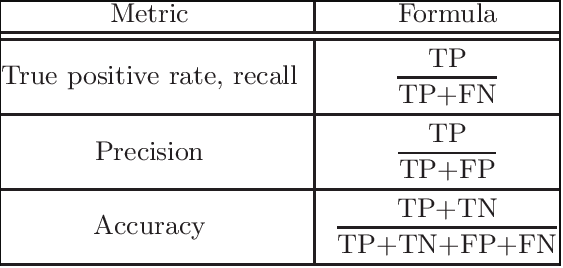

In [ ]:
def calculate_multiclass_metrics(true_labels, predicted_labels, num_classes):
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    for true, pred in zip(true_labels, predicted_labels):
        confusion_matrix[true][pred] += 1

    accuracy = sum(confusion_matrix[i][i] for i in range(num_classes)) / len(true_labels)

    precision = []
    recall = []

    for i in range(num_classes):
        tp = confusion_matrix[i][i]
        fp = sum(confusion_matrix[j][i] for j in range(num_classes) if j != i)
        fn = sum(confusion_matrix[i][j] for j in range(num_classes) if j != i)

        if tp + fp == 0:
            precision.append(0)
        else:
            precision.append(tp / (tp + fp))

        if tp + fn == 0:
            recall.append(0)
        else:
            recall.append(tp / (tp + fn))

    average_precision = sum(precision) / num_classes
    average_recall = sum(recall) / num_classes


    return accuracy, average_precision, average_recall


In [ ]:

k_values = [1, 3, 5, 7, 9]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.7604
Average Precision for k = 1: 0.7818
Average Recall for k = 1: 0.7468
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.7617
Average Precision for k = 3: 0.7859
Average Recall for k = 3: 0.7497
Performing 5-fold cross-validation for k = 5
Average Accuray for k = 5: 0.7503
Average Precision for k = 5: 0.7893
Average Recall for k = 5: 0.7372
Performing 5-fold cross-validation for k = 7
Average Accuray for k = 7: 0.7356
Average Precision for k = 7: 0.7737
Average Recall for k = 7: 0.7179
Performing 5-fold cross-validation for k = 9
Average Accuray for k = 9: 0.7336
Average Precision for k = 9: 0.7776
Average Recall for k = 9: 0.7192


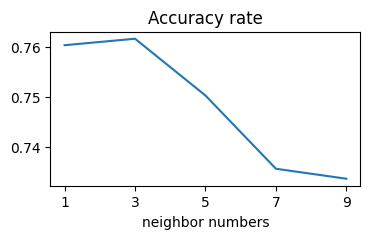

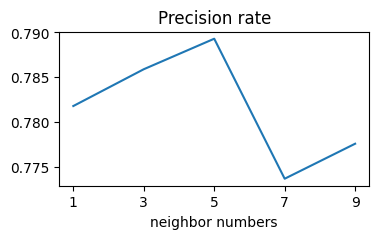

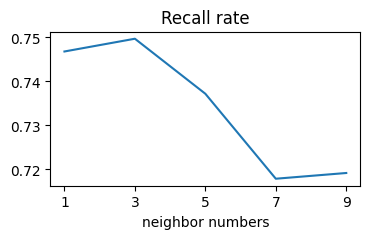

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.7604,0.7617,0.7503,0.7356,0.7336])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.7818,0.7859,0.7893,0.7737,0.7776])
plt.title("Precision rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.7468,0.7497,0.7372,0.7179,0.7192])
plt.title("Recall rate")

plt.xlabel("neighbor numbers")
plt.show()

In [10]:
categories = ['sport', 'business', 'politics', 'entertainment', 'tech']
for category in categories:

    category_data = data[data['Category'] == category]
    documents = category_data['Text']
    D = vectorizer.fit_transform(documents)
    word_frequencies = list(zip(vectorizer.get_feature_names_out(), D.sum(axis=0).tolist()[0]))
    top_10_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)[:10]
    down_10_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)[-10:]
    print()
    print(f"for category {category}:top 10 words")
    for word in top_10_words:
      print(word,end=" ")
    print()
    print(f"for category {category} :worst 10 words")

    for word in down_10_words:
        print(word,end=" ")
    print()


for category sport:top 10 words
('the', 6620) ('to', 3189) ('and', 2532) ('in', 2510) ('of', 1826) ('for', 1127) ('he', 1105) ('on', 1014) ('but', 992) ('is', 985) 
for category sport :worst 10 words
('zabaleta', 1) ('zakuani', 1) ('zara', 1) ('zealousness', 1) ('zheng', 1) ('zib', 1) ('ziers', 1) ('zoe', 1) ('zola', 1) ('zuluaga', 1) 

for category business:top 10 words
('the', 7133) ('to', 3306) ('of', 2864) ('in', 2821) ('and', 2161) ('said', 1100) ('is', 1072) ('that', 1052) ('for', 1045) ('it', 1011) 
for category business :worst 10 words
('yuganskneftgas', 1) ('yukon', 1) ('yulia', 1) ('yungmin', 1) ('yuri', 1) ('yury', 1) ('zack', 1) ('zardari', 1) ('zinc', 1) ('zoellick', 1) 

for category politics:top 10 words
('the', 7957) ('to', 3913) ('of', 2840) ('and', 2559) ('in', 2159) ('said', 1445) ('he', 1410) ('for', 1237) ('that', 1195) ('on', 1186) 
for category politics :worst 10 words
('yellow', 1) ('yob', 1) ('yoga', 1) ('youngster', 1) ('youngsters', 1) ('yourself', 1) ('yout

###Dataset for unigram and stopwords removed

In [ ]:
data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.6523
Average Precision for k = 1: 0.7812
Average Recall for k = 1: 0.6437
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.6060
Average Precision for k = 3: 0.7911
Average Recall for k = 3: 0.5882


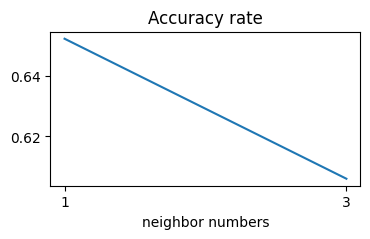

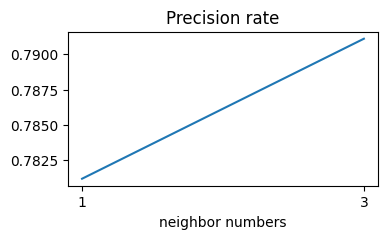

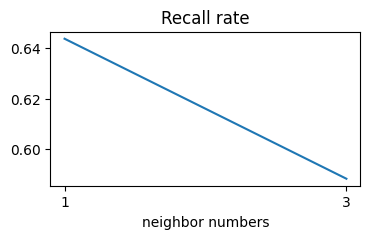

In [21]:
plt.figure(figsize=(4,2))
plt.plot(['1','3'],[0.6523,0.6060])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3'],[0.7812,0.7911])
plt.title("Precision rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3'],[0.6437,0.5882])
plt.title("Recall rate")

plt.xlabel("neighbor numbers")
plt.show()

In [ ]:
categories = ['sport', 'business', 'politics', 'entertainment', 'tech']
for category in categories:

    category_data = data[data['Category'] == category]
    documents = category_data['Text']
    D = vectorizer.fit_transform(documents)
    word_frequencies = list(zip(vectorizer.get_feature_names_out(), D.sum(axis=0).tolist()[0]))
    top_10_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)[:10]
    down_10_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)[-10:]
    print()
    print(f"for category {category}:top 10 words")
    for word in top_10_words:
      print(word,end=" ")
    print()
    print(f"for category {category} :worst 10 words")

    for word in down_10_words:
        print(word,end=" ")
    print()


for category sport:top 10 words
('said', 636) ('game', 356) ('year', 331) ('england', 329) ('time', 296) ('win', 295) ('world', 269) ('players', 209) ('cup', 206) ('team', 205) 
for category sport :worst 10 words
('zabaleta', 1) ('zakuani', 1) ('zara', 1) ('zealousness', 1) ('zheng', 1) ('zib', 1) ('ziers', 1) ('zoe', 1) ('zola', 1) ('zuluaga', 1) 

for category business:top 10 words
('said', 1100) ('year', 456) ('mr', 393) ('market', 284) ('new', 273) ('firm', 261) ('growth', 257) ('company', 253) ('economy', 233) ('government', 215) 
for category business :worst 10 words
('yuganskneftgas', 1) ('yukon', 1) ('yulia', 1) ('yungmin', 1) ('yuri', 1) ('yury', 1) ('zack', 1) ('zardari', 1) ('zinc', 1) ('zoellick', 1) 

for category politics:top 10 words
('said', 1445) ('mr', 1073) ('labour', 494) ('government', 464) ('election', 424) ('blair', 395) ('party', 376) ('people', 372) ('minister', 286) ('new', 280) 
for category politics :worst 10 words
('yeah', 1) ('yellow', 1) ('yob', 1) ('yog

###Dataset for bigram

In [ ]:
data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.3389
Average Precision for k = 1: 0.7559
Average Recall for k = 1: 0.3486
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.3510
Average Precision for k = 3: 0.7248
Average Recall for k = 3: 0.3281


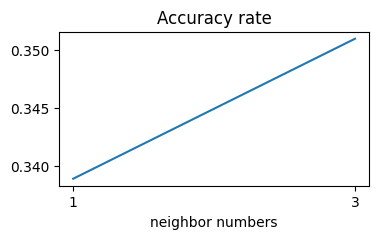

In [22]:
plt.figure(figsize=(4,2))
plt.plot(['1','3'],[0.3389,0.3510])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset for bigram and stopwords removed

In [ ]:
data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer(stop_words='english',ngram_range=(2, 2))
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.2758
Average Precision for k = 1: 0.8009
Average Recall for k = 1: 0.2938
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.3329
Average Precision for k = 3: 0.7849
Average Recall for k = 3: 0.3085


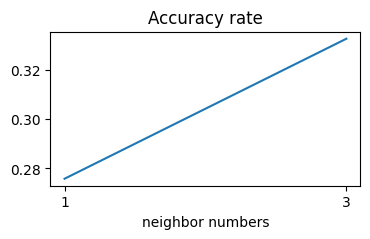

In [23]:
plt.figure(figsize=(4,2))
plt.plot(['1','3'],[0.2758,0.3329])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset wtih using TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('English Dataset.csv')


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3, 5, 7, 9]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.8993
Average Precision for k = 1: 0.8961
Average Recall for k = 1: 0.9000
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.9040
Average Precision for k = 3: 0.9041
Average Recall for k = 3: 0.9049
Performing 5-fold cross-validation for k = 5
Average Accuray for k = 5: 0.9161
Average Precision for k = 5: 0.9163
Average Recall for k = 5: 0.9166
Performing 5-fold cross-validation for k = 7
Average Accuray for k = 7: 0.9154
Average Precision for k = 7: 0.9178
Average Recall for k = 7: 0.9157
Performing 5-fold cross-validation for k = 9
Average Accuray for k = 9: 0.9215
Average Precision for k = 9: 0.9263
Average Recall for k = 9: 0.9227


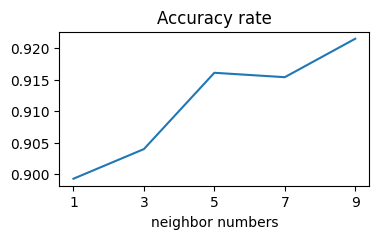

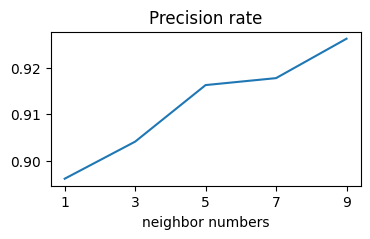

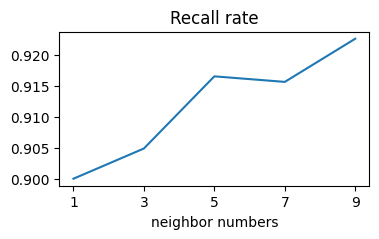

In [25]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.8993,0.9040,0.9161,0.9154,0.9215])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.8961,0.9041,0.9163,0.9178,0.9263])
plt.title("Precision rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.9000,0.9049,0.9166,0.9157,0.9227])
plt.title("Recall rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset wtih using TF-IDF Vectorizer and stopwords are removed

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('English Dataset.csv')


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3, 5, 7, 9]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.9087
Average Precision for k = 1: 0.9087
Average Recall for k = 1: 0.9091
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.9168
Average Precision for k = 3: 0.9159
Average Recall for k = 3: 0.9168
Performing 5-fold cross-validation for k = 5
Average Accuray for k = 5: 0.9302
Average Precision for k = 5: 0.9295
Average Recall for k = 5: 0.9297
Performing 5-fold cross-validation for k = 7
Average Accuray for k = 7: 0.9342
Average Precision for k = 7: 0.9325
Average Recall for k = 7: 0.9347
Performing 5-fold cross-validation for k = 9
Average Accuray for k = 9: 0.9463
Average Precision for k = 9: 0.9449
Average Recall for k = 9: 0.9471


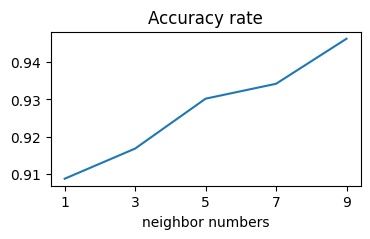

In [26]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.9087,0.9168,0.9302,0.9342,0.9463])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()

#WeightedKNN Part

###Dataset for unigram

In [ ]:

data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = WeightedKNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.7644
Average Precision for k = 1: 0.7864
Average Recall for k = 1: 0.7552
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.7309
Average Precision for k = 3: 0.7680
Average Recall for k = 3: 0.7190


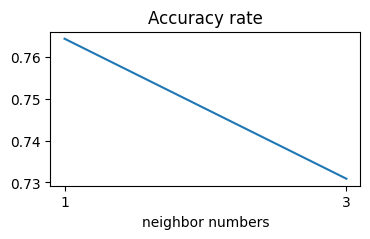

In [27]:
plt.figure(figsize=(4,2))
plt.plot(['1','3'],[0.7644,0.7309])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset for unigram and stopwords are removed

In [ ]:
data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = WeightedKNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.6362
Average Precision for k = 1: 0.7861
Average Recall for k = 1: 0.6349
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.5819
Average Precision for k = 3: 0.7781
Average Recall for k = 3: 0.5662


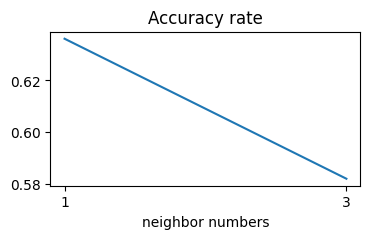

In [28]:
plt.figure(figsize=(4,2))
plt.plot(['1','3'],[0.6362,0.5819])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset for bigram

In [ ]:
data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = WeightedKNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5
        # Her bir k değeri için metrikleri raporlayın
    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.3275
Average Precision for k = 1: 0.7414
Average Recall for k = 1: 0.3359
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.2953
Average Precision for k = 3: 0.6158
Average Recall for k = 3: 0.2693


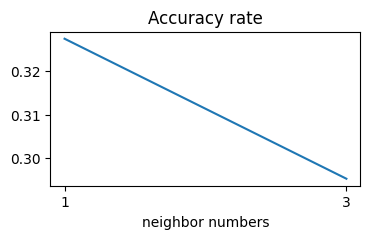

In [29]:
plt.figure(figsize=(4,2))
plt.plot(['1','3'],[0.3275,0.2953])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset for bigram and stopwords are removed

In [ ]:
data = pd.read_csv('English Dataset.csv')


vectorizer = CountVectorizer(ngram_range=(2, 2),stop_words='english')
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = WeightedKNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5
        # Her bir k değeri için metrikleri raporlayın
    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.2953
Average Precision for k = 1: 0.8447
Average Recall for k = 1: 0.2994
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.2839
Average Precision for k = 3: 0.5471
Average Recall for k = 3: 0.2558


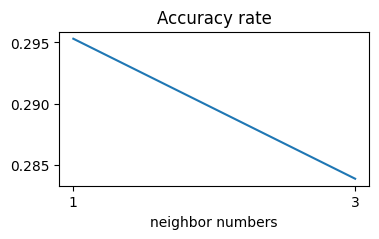

In [30]:
plt.figure(figsize=(4,2))
plt.plot(['1','3'],[0.2953,0.2839])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset wtih using TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('English Dataset.csv')

#unigram
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3, 5, 7, 9]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = WeightedKNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.9034
Average Precision for k = 1: 0.8995
Average Recall for k = 1: 0.9064
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.9047
Average Precision for k = 3: 0.9036
Average Recall for k = 3: 0.9046
Performing 5-fold cross-validation for k = 5
Average Accuray for k = 5: 0.9027
Average Precision for k = 5: 0.9054
Average Recall for k = 5: 0.9014
Performing 5-fold cross-validation for k = 7
Average Accuray for k = 7: 0.9074
Average Precision for k = 7: 0.9108
Average Recall for k = 7: 0.9065
Performing 5-fold cross-validation for k = 9
Average Accuray for k = 9: 0.9208
Average Precision for k = 9: 0.9245
Average Recall for k = 9: 0.9203


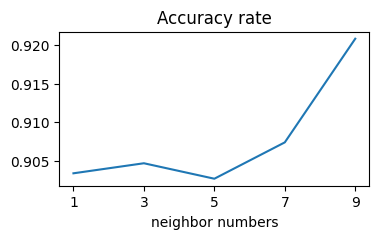

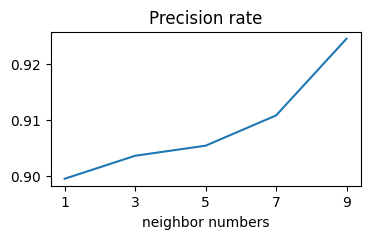

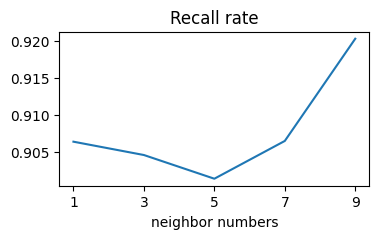

In [31]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.9034,0.9047,0.9027,0.9074,0.9208])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.8995,0.9036,0.9054,0.9108,0.9245])
plt.title("Precision rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.9064,0.9046,0.9014,0.9065,0.9203])
plt.title("Recall rate")

plt.xlabel("neighbor numbers")
plt.show()

###Dataset wtih using TF-IDF Vectorizer and stopwords are removed

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('English Dataset.csv')


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Text']).toarray()
Y= data['Category']



le=preprocessing.LabelEncoder()
cat =le.fit_transform(Y)
y=cat

In [ ]:
k_values = [1, 3, 5, 7, 9]

for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a}")
    precision_total = 0
    recall_total = 0
    accuracy_total = 0


    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = WeightedKNN(k=a)
        knn.fit(X_train, y_train)


        y_pred = knn.predict(X_test)
        accuracy, precision, recall= calculate_multiclass_metrics(y_test,y_pred,5)
        accuracy_total=accuracy_total+accuracy
        precision_total=precision_total+precision
        recall_total=recall_total+recall




    avg_precision = precision_total / 5
    avg_recall = recall_total / 5
    accuracy_total=accuracy_total/5

    print(f"Average Accuray for k = {a}: {accuracy_total:.4f}")
    print(f"Average Precision for k = {a}: {avg_precision:.4f}")
    print(f"Average Recall for k = {a}: {avg_recall:.4f}")

Performing 5-fold cross-validation for k = 1
Average Accuray for k = 1: 0.9128
Average Precision for k = 1: 0.9105
Average Recall for k = 1: 0.9122
Performing 5-fold cross-validation for k = 3
Average Accuray for k = 3: 0.9208
Average Precision for k = 3: 0.9201
Average Recall for k = 3: 0.9227
Performing 5-fold cross-validation for k = 5
Average Accuray for k = 5: 0.9302
Average Precision for k = 5: 0.9291
Average Recall for k = 5: 0.9318
Performing 5-fold cross-validation for k = 7
Average Accuray for k = 7: 0.9342
Average Precision for k = 7: 0.9332
Average Recall for k = 7: 0.9337
Performing 5-fold cross-validation for k = 9
Average Accuray for k = 9: 0.9349
Average Precision for k = 9: 0.9351
Average Recall for k = 9: 0.9350


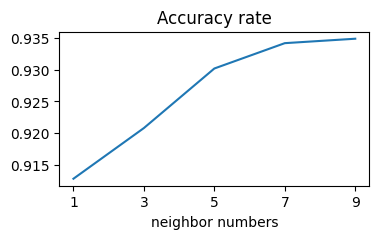

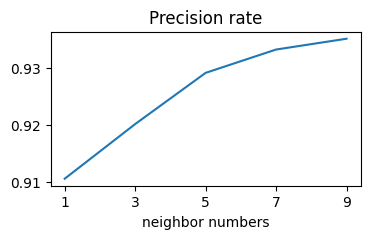

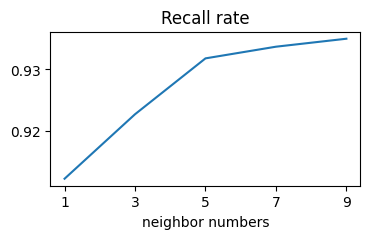

In [32]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.9128,0.9208,0.9302,0.9342,0.9349])
plt.title("Accuracy rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.9105,0.9201,0.9291,0.9332,0.9351])
plt.title("Precision rate")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.9122,0.9227,0.9318,0.9337,0.9350])
plt.title("Recall rate")

plt.xlabel("neighbor numbers")
plt.show()

###Results
The highest correct prediction appeared in TF IDF. Removing stopwords did not provide the benefit as expected and generally led to worsening results. The result obtained by calculating the importance value of the words using the process performed by TF-IDF Vectorizer turned out to be the most reliable result.

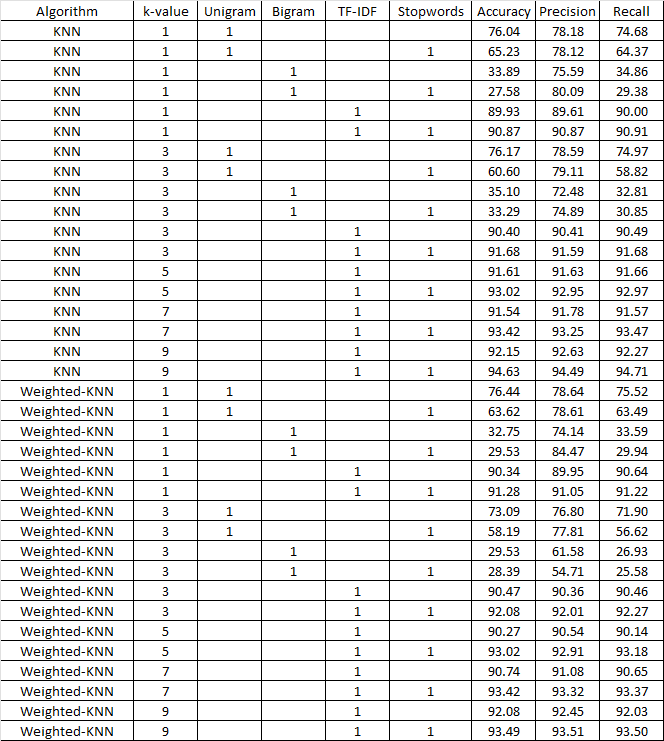

#Part 2 KNN Regressor Model

In [84]:
df = pd.read_csv('insurance.csv')
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


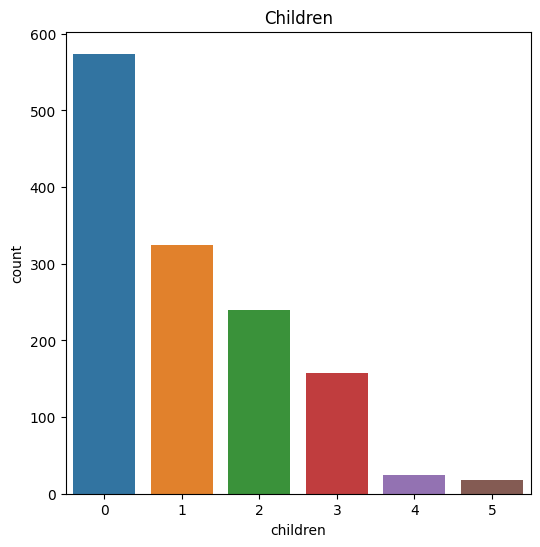

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

<ipython-input-91-7ec4bc8f949f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


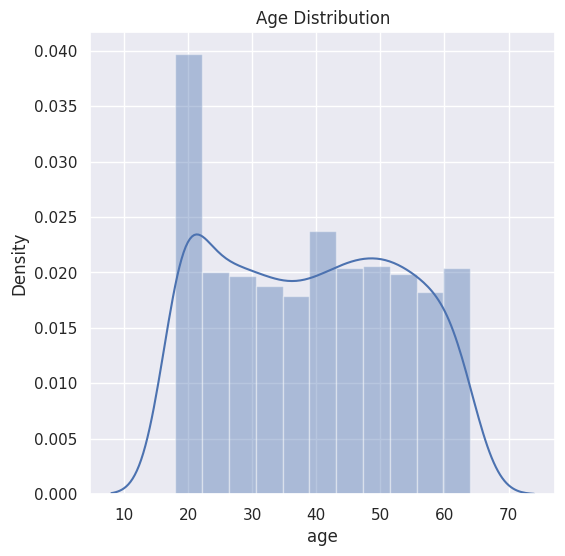

In [91]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

<ipython-input-93-fa5a17d58dfb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


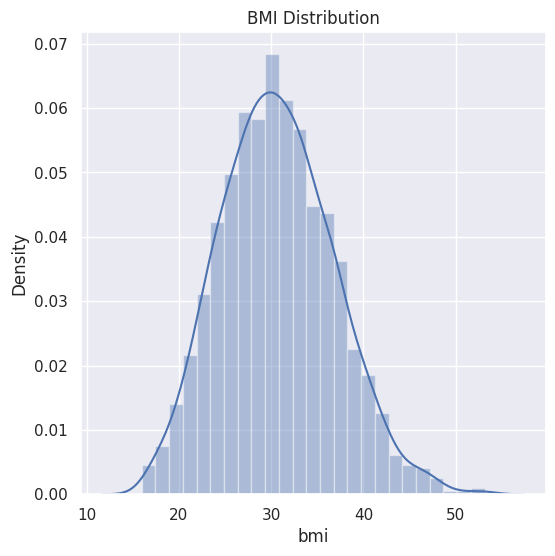

In [93]:

# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

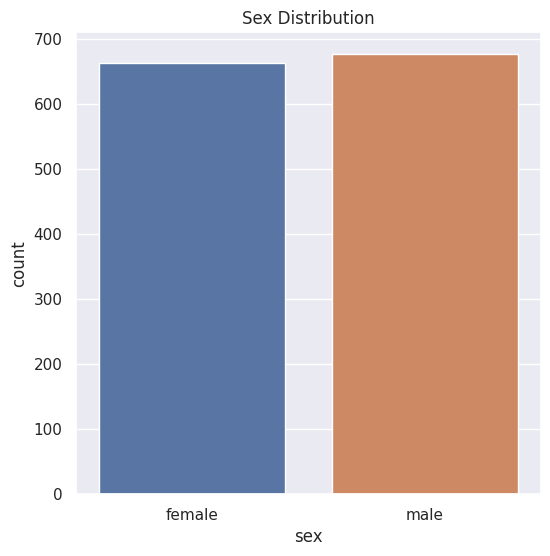

In [94]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()


K-Nearest Neighbors Regression (KNN Regression) is a machine learning algorithm used for predicting continuous values. It functions by identifying the 'k' nearest data points to a given query point from the training dataset, using a chosen distance metric such as Euclidean distance. To predict the value for a new data point, KNN Regression computes the average (or weighted average) of the target values of these 'k' nearest neighbors. The 'k' value, representing the number of neighbors considered, influences the model's complexity, with smaller 'k' yielding more complex predictions and larger 'k' providing smoother but potentially oversimplified outcomes. Although straightforward, KNN Regression might face limitations in high-dimensional spaces or with extensive datasets due to computational requirements, often necessitating additional techniques for improved performance.

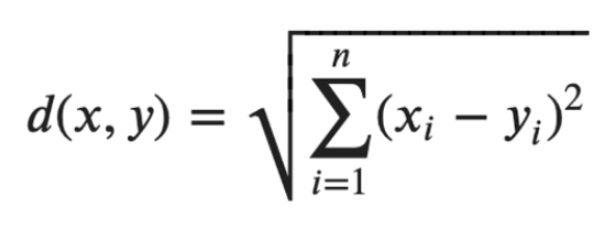



In [48]:
class KNNRegressor():
    def __init__(self,k):
        self.k = k

    def __repr__(self):
        return f"KNNRegressor {{ k = {self.k} }}"

    def fit(self, X_train, y_train):
        self.X_train_ = X_train
        self.y_train_ = y_train

    def euclidean_distance(self, a, b):
        total = 0
        for a_i, b_i in zip(a, b):
            total += (a_i - b_i) ** 2
        return total ** .5

    def k_nearest_neighbor_indices(self, distances):

        distances_and_indices = [(distance, i) for i, distance in enumerate(distances)]

        distances_and_indices.sort()

        k_distances_and_indices = distances_and_indices[:self.k]

        return [i for _, i in k_distances_and_indices]

    def predict_row(self, X_row):

        distances = [self.euclidean_distance(train_row, X_row) for train_row in self.X_train_]


        k_indices = self.k_nearest_neighbor_indices(distances)


        values = [self.y_train_[index] for index in k_indices]


        return sum(values)/len(values)

    def predict(self, X):
        return [self.predict_row(X_row) for X_row in X]

    def r2_score(self, y_true, y_pred):

        ssr_model = 0
        for y_i, y_hat in zip(y_true, y_pred):
            ssr_model += (y_i - y_hat) ** 2

        y_true_mean = sum(y_true) / len(y_true)
        ssr_total = 0
        for y_i in y_true:
            ssr_total += (y_i - y_true_mean) ** 2

        try:
            return 1 - (ssr_model / ssr_total)
        except:
            return 0.0 # float

    def score(self, X, y_true):
        preds = self.predict(X)
        return self.r2_score(y_true, preds)

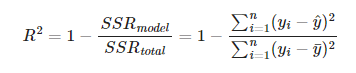

In the knn regressor classification, all the data we have must be in int or float, so we make our data suitable for this with label encoding

In [49]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

df = pd.get_dummies(df, columns=['region'])


X = df.drop('charges', axis=1).values
y = df['charges'].values


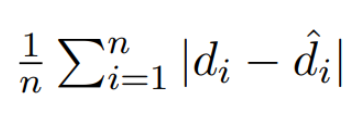

In this part of the experiment we will be using Mean Absolute Error(MAE) metric to evaluate our ML models' predictions.
Mean absolute error refers to average of the magnitude of difference between the prediction of an observation and the true value of that observation. When there is more than one output in the prediction, the meanf of the means absolute errors can get considered.

In [50]:
def calculate_mae(y_true, y_pred):


    mae=0
    for i in range(len(y_pred)):
        y_deger = y_true[i]
        pred_deger = y_pred[i]
        error=abs(y_deger-pred_deger)
        mae=mae+error
    return mae/len(y_pred)

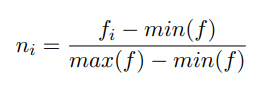


Min-max normalization is a data preprocessing technique used in KNN regression and other machine learning algorithms to scale numeric features within a specific range, typically between 0 and 1.

In [51]:
def min_max_normalization(data):

    temp_data = data.copy()
    length = len(temp_data[0])
    for i in range(length):
        col_data = temp_data[:, i]
        _max = np.max(col_data)
        _min = np.min(col_data)


        col_data = (col_data - _min) / (_max - _min)


        temp_data[:, i] = col_data

    return temp_data

In [61]:
def min_max_normalization_y(data):

    temp_data = data.copy()
    _max = np.max(temp_data)
    _min = np.min(temp_data)

    normalized_data = (temp_data - _min) / (_max - _min)
    return normalized_data

In [63]:

k_values = [1, 3, 5, 7, 9]
for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a} without normalization")
    avg_mae=0
    avg_score=0

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):

        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNNRegressor(k = a)
        knn.fit(X_train, y_train)
        wpred = knn.predict(X_test)
        mae = calculate_mae(y_test,wpred)
        score = knn.score(X_test, y_test)

        avg_score=avg_score+score

        avg_mae=avg_mae+mae

    print(avg_mae/5)
    print(avg_score/5)


Performing 5-fold cross-validation for k = 1 without normalization
7701.005215280367
-0.3652562546425392
Performing 5-fold cross-validation for k = 3 without normalization
7277.846361598063
0.1260982519799051
Performing 5-fold cross-validation for k = 5 without normalization
7638.86617506722
0.1554335891027343
Performing 5-fold cross-validation for k = 7 without normalization
8025.816636755511
0.1267406779532495
Performing 5-fold cross-validation for k = 9 without normalization
8107.06459656762
0.15405701727670856


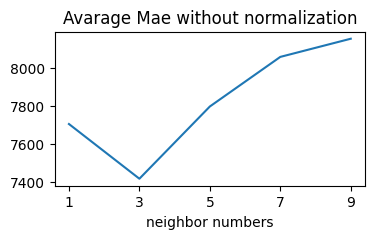

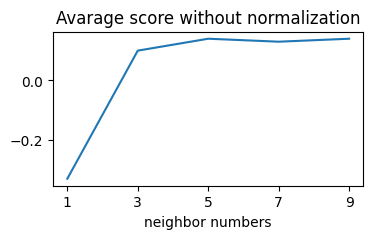

In [45]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[7705.68,7416.93,7798.13,8059.84,8155.75])
plt.title("Avarage Mae without normalization")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[-0.33,0.10,0.14,0.13,0.14])
plt.title("Avarage score without normalization")

plt.xlabel("neighbor numbers")
plt.show()

In [62]:
for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a} with normalization")
    avg_mae=0
    avg_score=0

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        X_train=min_max_normalization(X_train)
        X_test=min_max_normalization(X_test)
        y_train=min_max_normalization_y(y_train)
        y_test=min_max_normalization_y(y_test)
        knn = KNNRegressor(k = a)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)

        score = knn.score(X_test, y_test)
        avg_score=avg_score+score
        mae = calculate_mae(y_test,pred)

        avg_mae=avg_mae+mae
    print(avg_mae/5)
    print(avg_score/5)


Performing 5-fold cross-validation for k = 1 with normalization
0.07217984560042784
0.6684152622893273
Performing 5-fold cross-validation for k = 3 with normalization
0.06404634129797024
0.7396543348449811
Performing 5-fold cross-validation for k = 5 with normalization
0.06514290900944442
0.7516057981401778
Performing 5-fold cross-validation for k = 7 with normalization
0.06904843675840822
0.7207500158923216
Performing 5-fold cross-validation for k = 9 with normalization
0.07024494200696514
0.7182925068598262


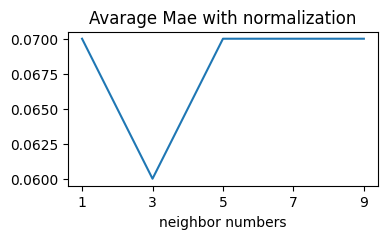

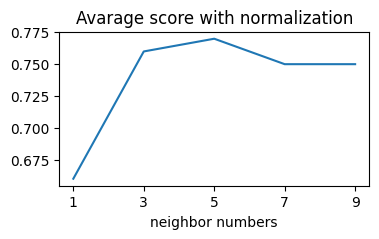

In [64]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.07,0.06,0.07,0.07,0.07])
plt.title("Avarage Mae with normalization")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.67,0.74,0.75,0.72,0.72])
plt.title("Avarage score with normalization")

plt.xlabel("neighbor numbers")
plt.show()

###Weighted KNN Regressor Model

The Weighted KNN Regressor model predicts target values for test data points by considering the inverse distances to the nearest neighbors as weights in calculating the weighted average.

In [79]:
class KNNRegressorW():
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def find_neighbors(self, x_test):
        distances = [self.euclidean_distance(x_test, x_train) for x_train in self.X_train]
        sorted_indices = np.argsort(distances)[:self.k]
        return sorted_indices

    def predict(self, X_test):
        y_pred = []
        for x_test in X_test:
            neighbors_indices = self.find_neighbors(x_test)
            distances = np.array([self.euclidean_distance(x_test, self.X_train[i]) for i in neighbors_indices])


            inverse_distances = 1 / (distances + 0.00001)


            weighted_sum = 0
            total_inverse_distance = np.sum(inverse_distances)
            for i, idx in enumerate(neighbors_indices):
                weighted_sum += (inverse_distances[i] / total_inverse_distance) * self.y_train[idx]

            y_pred.append(weighted_sum)

        return np.array(y_pred)
    def r2_score(self, y_true, y_pred):

        ssr_model = 0
        for y_i, y_hat in zip(y_true, y_pred):
            ssr_model += (y_i - y_hat) ** 2

        y_true_mean = sum(y_true) / len(y_true)
        ssr_total = 0
        for y_i in y_true:
            ssr_total += (y_i - y_true_mean) ** 2

        try:
            return 1 - (ssr_model / ssr_total)
        except:
            return 0.0 # float

    def score(self, X, y_true):
        preds = self.predict(X)
        return self.r2_score(y_true, preds)

In [80]:
k_values = [1, 3, 5, 7, 9]
for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a} without normalization")
    avg_mae=0
    avg_score=0

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):

        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]


        knn = KNNRegressorW(k = a)
        knn.fit(X_train, y_train)
        wpred = knn.predict(X_test)
        mae = calculate_mae(y_test,wpred)
        score = knn.score(X_test, y_test)

        avg_score=avg_score+score

        avg_mae=avg_mae+mae

    print(avg_mae/5)
    print(avg_score/5)

Performing 5-fold cross-validation for k = 1 without normalization
7576.5488802614655
-0.31820539881487475
Performing 5-fold cross-validation for k = 3 without normalization
7218.851715416432
0.13627792532888167
Performing 5-fold cross-validation for k = 5 without normalization
7664.145023469692
0.14732019826199477
Performing 5-fold cross-validation for k = 7 without normalization
7862.551300248869
0.14079010009233087
Performing 5-fold cross-validation for k = 9 without normalization
7958.923241110523
0.17010080816446335


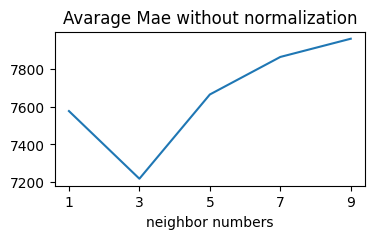

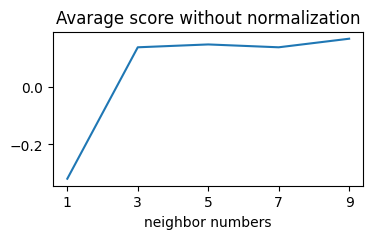

In [82]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[7576.55,7218.85,7664.15,7862.55,7958.92])
plt.title("Avarage Mae without normalization")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[-0.32,0.14,0.15,0.14,0.17])
plt.title("Avarage score without normalization")

plt.xlabel("neighbor numbers")
plt.show()

In [81]:
for a in k_values:
    print(f"Performing 5-fold cross-validation for k = {a} with normalization")
    avg_mae=0
    avg_score=0

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_indices = np.array_split(indices, 5)

    for i in range(5):
        test_indices = split_indices[i]
        train_indices = np.concatenate([split_indices[j] for j in range(5) if j != i])


        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        X_train=min_max_normalization(X_train)
        X_test=min_max_normalization(X_test)
        y_train=min_max_normalization_y(y_train)
        y_test=min_max_normalization_y(y_test)
        knn = KNNRegressorW(k = a)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)

        score = knn.score(X_test, y_test)
        avg_score=avg_score+score
        mae = calculate_mae(y_test,pred)

        avg_mae=avg_mae+mae
    print(avg_mae/5)
    print(avg_score/5)

Performing 5-fold cross-validation for k = 1 with normalization
0.07051491845234545
0.6758143293247025
Performing 5-fold cross-validation for k = 3 with normalization
0.06661451727849235
0.7437766466963427
Performing 5-fold cross-validation for k = 5 with normalization
0.06147188708187088
0.7604421993038595
Performing 5-fold cross-validation for k = 7 with normalization
0.06922095963160695
0.7270713600134425
Performing 5-fold cross-validation for k = 9 with normalization
0.0688058688050932
0.7291939631911765


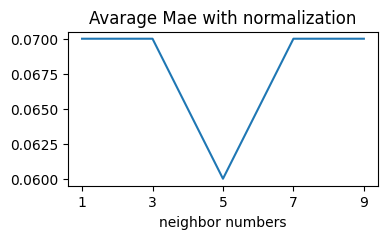

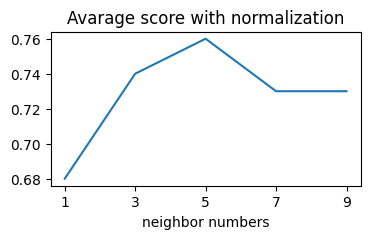

In [83]:
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.07,0.07,0.06,0.07,0.07])
plt.title("Avarage Mae with normalization")

plt.xlabel("neighbor numbers")
plt.show()
plt.figure(figsize=(4,2))

plt.plot(['1','3','5','7','9'],[0.68,0.74,0.76,0.73,0.73])
plt.title("Avarage score with normalization")

plt.xlabel("neighbor numbers")
plt.show()

When we normalized the data, our mae and score values improved significantly. We must normalize our values to get more accurate results.